# Homework 2
# PH 418
# Jonathan Perkins
# 2/20/2024

# Imports

In [44]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import r_regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

import numpy as np
import matplotlib.pyplot as plt

# Linear Regression Models

## a) Reading data

In [2]:
housing = fetch_california_housing()

In [26]:
# Feature matrix
X = housing.data
print('X shape: ', X.shape, '\n') # 20640 samples, 8 features

# Column (feature) names
print('Feature names: ', housing.feature_names)

# Feature values of the first sample
print('Feature values: ', X[0,:], '\n') #First sample

X shape:  (20640, 8) 

Feature names:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Feature values:  [   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ] 



y shape:  (20640,) 

First 10 values:  [4.526 3.585 3.521 3.413 3.422 2.697 2.992 2.414 2.267 2.611] 

['MedHouseVal']


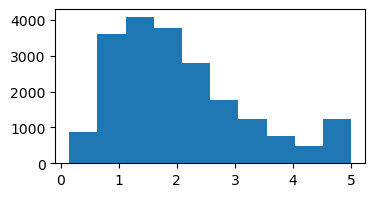

In [28]:
# Target matrix (np array with housing values in units of $100,000)
y = housing.target
print('y shape: ', y.shape,'\n')

print('First 10 values: ', y[0:10], '\n')

# Examining the target data distribution:
fig, ax = plt.subplots(figsize=(4,2))
ax.hist(y)

# names of target classes.
print(housing.target_names)

In [13]:
# sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
# Note: test_size and train_size is between 0.0 to 1.0.
# If None is specified, test_size = 0.25 and train_size = 1- test_size = 0.75.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, shuffle = True)

print('X training data shape: ', X_train.shape, '\n', 'X test data shape: ', X_test.shape, '\n')
print('y training data shape: ', y_train.shape, '\n', 'y test data shape: ', y_test.shape)

# Afterwards, one can fit the model with the training set (X_train, y_train),
# and make predictions with the test set (X_test, y_test) for evaluation.

X training data shape:  (16512, 8) 
 X test data shape:  (4128, 8) 

y training data shape:  (16512,) 
 y test data shape:  (4128,)


## b) Linear regression

In [30]:
# sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
lr = LinearRegression()

# Training the model
lr.fit(X_train, y_train)

# Evaluating model
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)

print("Score on training data: ", lr_train_score)
print("Score on test data : ", lr_test_score)

Score on training data:  0.6083741964648377
Score on test data :  0.5965968374812283


## c) Predictions

In [31]:
y_pred = lr.predict(X_test)
print("Predicted y array: ", y_pred)

Predicted y array:  [2.12567705 0.93977118 2.70887192 ... 2.9460839  2.63875476 1.46985176]


In [32]:
# Pearson correlation coefficient
y_r = r_regression(X_test, y_pred)
print("Pearson correlation coefficient: ", y_r)

# Mean squared error (MSE)
y_mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", y_mse)

Pearson correlation coefficient:  [ 0.88881686  0.14891397  0.24661352 -0.12403087 -0.03708679 -0.05494136
 -0.19563507 -0.05168156]
Mean squared error:  0.52914023453974


## d) Scatter plot

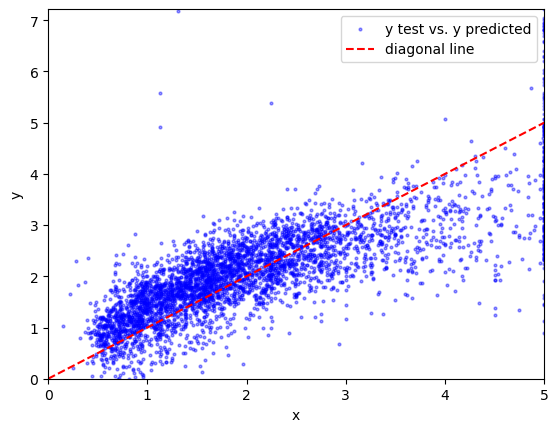

In [58]:
# Plotting r and MSE
fig, ax = plt.subplots()

ax.scatter(y_test, y_pred, color='blue', label='y test vs. y predicted', alpha=0.4, s=4)
#ax.plot(x, y2, c='purple', label="y'(x)")
ax.plot(np.linspace(0, len(y_test), len(y_test)), np.linspace(0, len(y_pred), len(y_pred)), color='r', ls='--', label='diagonal line')

ax.set_xlabel("x")
ax.set_ylabel("y")

ax.set_xlim(0,max(y_test))
ax.set_ylim(0,max(y_pred))

ax.legend()
plt.show()

## e) Intercept and coefficients

In [42]:
y_int = lr.intercept_
y_coef = lr.coef_

print("Intercept: ", y_int)
print("Coefficients: ", y_coef)
print('Feature names: ', housing.feature_names)

Intercept:  -37.5157541598365
Coefficients:  [ 4.38565392e-01  9.68722037e-03 -1.04705005e-01  6.32189474e-01
 -3.67690711e-06 -3.44771323e-03 -4.25964056e-01 -4.40601114e-01]
Feature names:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Most important feature: Average Bedrooms (feature 3) <br>
After that, it's Median Income, then House Age)

# 1) Reularization in Linear Models

## a) Splitting data

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

print('X training data shape: ', X_train.shape, '\n', 'X test data shape: ', X_test.shape, '\n', 'X validation data shape: ', X_val.shape, '\n')
print('y training data shape: ', y_train.shape, '\n', 'y test data shape: ', y_test.shape, '\n', 'y validation data shape: ', y_val.shape)

X training data shape:  (12384, 8) 
 X test data shape:  (4128, 8) 
 X validation data shape:  (4128, 8) 

y training data shape:  (12384,) 
 y test data shape:  (4128,) 
 y validation data shape:  (4128,)


## b) Ridge model

In [64]:
# sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, 
        # tol=0.0001, solver='auto', positive=False, random_state=None)

alpha_values = [0.01, 10**(-1.5), 0.1, 10**(-0.5), 1, 10**(0.5), 10]
ridge_values = []
validation_scores = []

for alpha in alpha_values:
    lr = Ridge(alpha = alpha)
    lr.fit(X_train, y_train)
    ridge_values.append(lr.score(X_test, y_test))
    validation_scores.append(lr.score(X_val, y_val))

print("Ridge values: ", ridge_values)
print("Validation scores: ", validation_scores)

Ridge values:  [0.5963289273949103, 0.5963288466442821, 0.5963285911259603, 0.5963277814844159, 0.5963252050344127, 0.5963168986348516, 0.5962891161876195]
Validation scores:  [0.6182075404884189, 0.6182072454844743, 0.6182063124852137, 0.6182033609362636, 0.618194015936389, 0.6181643531155726, 0.6180695132176344]


## c) Computing validation scores

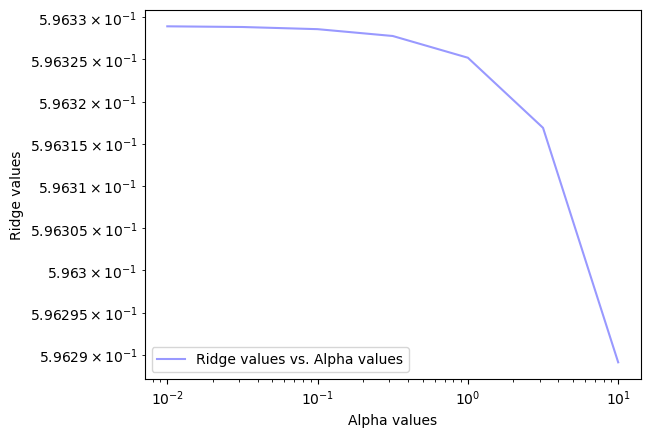

In [65]:
fig, ax = plt.subplots()

plt.loglog(alpha_values, ridge_values, color='blue', label='Ridge values vs. Alpha values', alpha=0.4)

ax.set_xlabel("Alpha values")
ax.set_ylabel("Ridge values")

ax.legend()

plt.show()

## d) New predictions

In [67]:
lr = Ridge(alpha = 0.1)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print('Predicted y array: ', y_pred)

Predicted y array:  [2.11866281 0.94616517 2.70769106 ... 2.93946321 2.63403314 1.47992389]


In [68]:
# Pearson correlation coefficient
y_r = r_regression(X_test, y_pred)
print("Pearson correlation coefficient: ", y_r)

# Mean squared error (MSE)
y_mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", y_mse)

Pearson correlation coefficient:  [ 0.89047842  0.14972846  0.25217254 -0.12346243 -0.03591938 -0.05486013
 -0.19180284 -0.05496153]
Mean squared error:  0.5294920908277639


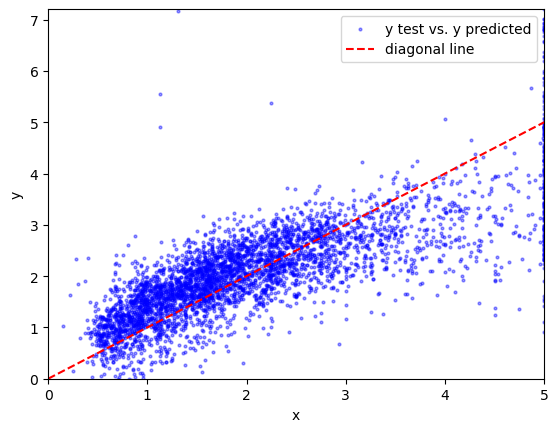

In [69]:
# Plotting r and MSE
fig, ax = plt.subplots()

ax.scatter(y_test, y_pred, color='blue', label='y test vs. y predicted', alpha=0.4, s=4)
#ax.plot(x, y2, c='purple', label="y'(x)")
ax.plot(np.linspace(0, len(y_test), len(y_test)), np.linspace(0, len(y_pred), len(y_pred)), color='r', ls='--', label='diagonal line')

ax.set_xlabel("x")
ax.set_ylabel("y")

ax.set_xlim(0,max(y_test))
ax.set_ylim(0,max(y_pred))

ax.legend()
plt.show()